### The Reuters dataset

We'll classify Routers news into 46 categories

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers

%matplotlib inline

# load datasets that comes with Keras
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [30]:
len(train_data)

8982

In [31]:
len(test_data)

2246

### Vectorize dataset

In [32]:
# Vectorize dataset
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Vectorize labels

Since our labels is multiclass:
- We can cast the labels into integer tensor
- We can one-hot encode them (categorical encoding)

Here we'll to one-hot encoding using Keras utils.

In [33]:
# Vectorize our label
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [34]:
y_train.shape

(8982, 46)

In [35]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Build model

In [36]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(46, activation='softmax')) # layer's node count = 46, need to match the class/category length
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [37]:
# Split training dataset into training and validation
x_val = x_train[:1000]
x_train2 = x_train[1000:]

y_val = y_train[:1000]
y_train2 = y_train[1000:]

### Run training

In [38]:
model = get_model()

EPOCHS = 20
history = model.fit(x_train2, y_train2, epochs=EPOCHS, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 22ms/step - loss: 2.5955 - acc: 0.5019 - val_loss: 1.7237 - val_acc: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3905 - acc: 0.7108 - val_loss: 1.2598 - val_acc: 0.7320
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0145 - acc: 0.7828 - val_loss: 1.0986 - val_acc: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7938 - acc: 0.8326 - val_loss: 1.0236 - val_acc: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6317 - acc: 0.8703 - val_loss: 0.9316 - val_acc: 0.8120
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5083 - acc: 0.8934 - val_loss: 0.8963 - val_acc: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4051 - acc: 0.9172 - val_loss: 0.9309 - val_acc: 0.8010
Epoch 8/20
16/16 [==============================] - 0s 15ms/step - loss: 0.3369 - a

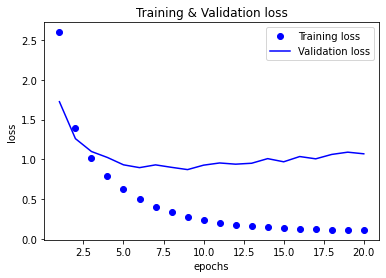

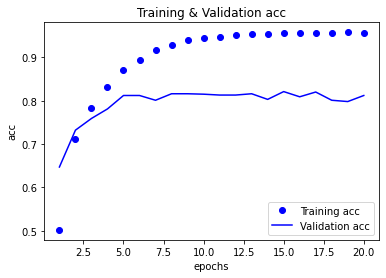

In [39]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & Validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

#### Our model overfit after 9 epochs, lets train using all data with 9 epochs

In [40]:
model = get_model()
model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 0s 13ms/step - loss: 2.4839 - acc: 0.5289
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.3011 - acc: 0.7302
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9679 - acc: 0.7967
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7577 - acc: 0.8389
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6012 - acc: 0.8734
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4829 - acc: 0.9012
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3917 - acc: 0.9176
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3211 - acc: 0.9311
Epoch 9/9
18/18 [==============================] - 0s 13ms/step - loss: 0.2674 - acc: 0.9409


In [41]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 0.9635 - acc: 0.7979


In [42]:
print("Model Accuracy: {}%".format(results[1]))

Model Accuracy: 0.7978628873825073%


In [15]:
# Make prediction

predictions = model.predict(x_test)

In [16]:
predictions[0]

array([1.22401791e-04, 3.63839754e-05, 2.98780083e-06, 6.98168457e-01,
       2.94519067e-01, 4.31702802e-06, 7.31361297e-06, 1.41546925e-05,
       1.14443002e-03, 2.55015420e-05, 5.94768289e-06, 2.02527692e-04,
       4.63379229e-06, 3.81280770e-05, 1.62708802e-05, 9.53387462e-06,
       2.42126509e-04, 1.14051843e-04, 1.16358506e-05, 3.21756327e-03,
       6.53838855e-04, 8.72959354e-05, 2.56946032e-06, 3.25643632e-04,
       9.13921322e-05, 1.26171253e-05, 1.10136978e-06, 3.96886535e-05,
       3.61836246e-05, 3.36042358e-05, 2.44408739e-06, 7.94967036e-06,
       1.26966333e-05, 5.16231376e-06, 1.52336634e-05, 1.40181169e-06,
       5.63697722e-06, 2.59506283e-04, 2.57386000e-06, 2.85459246e-04,
       1.61892949e-05, 1.51826767e-04, 7.48859247e-06, 2.74134836e-05,
       4.77198819e-06, 2.79982009e-06], dtype=float32)

In [17]:
predictions[0].shape

(46,)

In [18]:
np.sum(predictions[0])

1.0

In [19]:
np.argmax(predictions[0])

3

In [20]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [21]:
np.array(train_labels)

array([ 3,  4,  3, ..., 25,  3, 25])

### Another way to handle multicategorical labels

Is to cast them as integer tensor and use different loss function called `sparse_categorical_crossentropy`

In [22]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=())

Epoch 1/9
18/18 [==============================] - 0s 13ms/step - loss: 2.5462 - acc: 0.4993
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4025 - acc: 0.7061
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0315 - acc: 0.7794
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.8150 - acc: 0.8267
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6509 - acc: 0.8623
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5227 - acc: 0.8922
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4277 - acc: 0.9113
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3436 - acc: 0.9270
Epoch 9/9
18/18 [==============================] - 0s 12ms/step - loss: 0.2883 - acc: 0.9375


In [24]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 0.9665 - acc: 0.7947


In [25]:
print("Model Accuracy: {}%".format(results[1]))

Model Accuracy: 0.7947462201118469%


In [26]:
# Similar result to when label are one-hot encoded.